${\bf Project \space 1: \space Iris \space Data \space Classification}$

This code goes through several methods of ML multiclass classification on the Iris Flower Data

In [1]:
#  Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
#  Load and split iris data for training, validating, and testing.
iris_data = load_iris()

features, features_test, target, target_test = train_test_split(iris_data.data, iris_data.target, test_size=0.20)
f_train, f_valid, t_train, t_valid = train_test_split(features, target, test_size=0.20)

print("Training size: ", f_train.shape, "Validating size: ", f_valid.shape, "Testing size: ", features_test.shape)

Training size:  (96, 4) Validating size:  (24, 4) Testing size:  (30, 4)


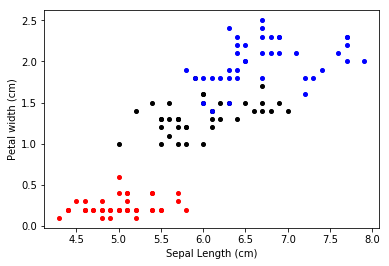

In [10]:
#  Lets plot some of the data
index0 = target == 0
index1 = target == 1
index2 = target == 2

plt.plot(features[index0, 0], features[index0, 3], 'o', color='r', markersize=4)
plt.plot(features[index1, 0], features[index1, 3], 'o', color='k', markersize=4)
plt.plot(features[index2, 0], features[index2, 3], 'o', color='b', markersize=4)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal width (cm)')

plt.show()

In [56]:
#  Method 1: Naive Bayes, easy and simple

clf = GaussianNB()
clf.fit(f_train, t_train)

print("Accuracy Scores")
print("Naive Bayes: ", clf.score(f_valid, t_valid))

Accuracy Scores
Naive Bayes:  0.9583333333333334


About 96% accuracy with Naive Bayes, not bad for a quick/simple approach.

In [53]:
#  Method 2: SVM, several options

#  Define flexible hyperparameters for initial inquiry
C = 1.0
gamma = 1.0

#  Default rbf kernel
svc1 = svm.SVC(C=C, gamma=gamma)
svc1.fit(f_train, t_train)

#  Linear kernel using one-vs.-one
svc2 = svm.SVC(C=C, kernel='linear')
svc2.fit(f_train, t_train)

#  Linear kernel using one-vs.-rest
svc3 = svm.LinearSVC(C=C, max_iter=5000)  # Note the larger number of interations needed bc of training size
svc3.fit(f_train, t_train)

#  Polynomial kernel with degree 3
svc4 = svm.SVC(C=C, gamma=gamma, kernel='poly', degree=3)
svc4.fit(f_train, t_train)

print("Accuracy Scores")
print("Radial Basis Kernel: ", svc1.score(f_valid, t_valid))
print("Linear (ovo): ", svc2.score(f_valid, t_valid))
print("Linear (ovr): ", svc3.score(f_valid, t_valid))
print("Polynomial 3: ", svc4.score(f_valid, t_valid))

Accuracy Scores
Radial Basis Kernel:  0.9583333333333334
Linear (ovo):  0.9583333333333334
Linear (ovr):  0.9583333333333334
Polynomial 3:  0.9583333333333334


All SVM classifiers predict (in this instance) equally well. 

I am curious regarding the linear kernels, how OVO and OVR approaches differ when both generates 3 subclassifiers as we have 3 classes.

For furhter investigation, we will toggle C and/or gamma for the rbf kernel and linear (ovr) classifiers.

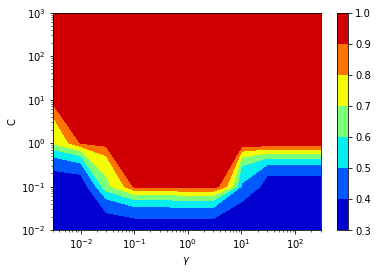

In [49]:
#  Run a loop to plot optimal hyperparameters for SVC with rbf kernel
#  Linear (ovr) was too finicky with max iterations to do this
setGammas = np.array([0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300])
setCs = np.array([0.01, 0.1, 1, 10, 100, 1000])
accuracies = np.zeros(shape=(len(setCs), len(setGammas)))
for c in setCs:
    for gamma in setGammas:
        clf = svm.SVC(C=c, gamma=gamma)
        clf.fit(f_train, t_train)
        accuracies[setCs == c, setGammas == gamma] = clf.score(f_train, t_train)

plt.contourf(setGammas, setCs, accuracies, cmap=plt.get_cmap('jet'))
plt.xlabel(r'$\gamma$')
plt.ylabel('C')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

plt.show()

Wow Gamma = C = 1.0 gives optimal estimation, thats crazy.

In [52]:
#  Method 3: Decision Trees and Random Forests

clfTree = DecisionTreeClassifier()
clfTree.fit(f_train, t_train)

clfForest = RandomForestClassifier(n_estimators=50)
clfForest.fit(f_train, t_train)

print("Accuracy Scores")
print("Decision Tree: ", clfTree.score(f_valid, t_valid))
print("Random Forrest: ", clfForest.score(f_valid, t_valid))

Accuracy Scores
Decision Tree:  0.9583333333333334
Random Forrest:  0.9583333333333334


Both perfom (in this case) with identical accuracy

In [57]:
#  Method 4: Neareast Neighborhood 

#  Use 15 points for initial classification
clf = neighbors.KNeighborsClassifier(n_neighbors=15)
clf.fit(f_train, t_train)

print("Accuracy Scores")
print("k Nearest Neighbors: ", clf.score(f_valid, t_valid))

Accuracy Scores
k Nearest Neighbors:  0.9583333333333334


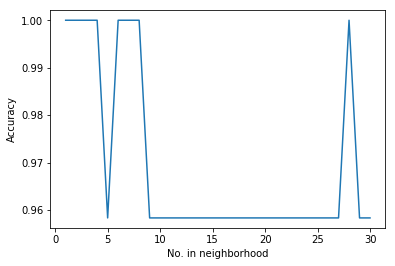

In [59]:
#  Lets examine optimal k

k = np.arange(30) + 1
accuracy = []
for near in k:
    clf = neighbors.KNeighborsClassifier(n_neighbors=near)
    clf.fit(f_train, t_train)
    accuracy.append(accuracy_score(t_valid, clf.predict(f_valid)))

plt.plot(k, accuracy)
plt.ylabel("Accuracy")
plt.xlabel("No. in neighborhood")

plt.show()

Accuracy bounces between 96% and 100%, the latter overfitting/random partition of the data so we can select k=15 as a reasonable choice.

In [61]:
#  Method 5: Unsupervised Cluster Analysis

clf = KMeans(n_clusters=3)
clf.fit(f_train)

cluster = clf.predict(f_valid)
compare = cluster == t_valid

print("Clustering: ", accuracy_score(t_valid, cluster))

Clustering:  0.375


I wanted to include this method to compare how a form of unsupervised learning might compare to supervised methods. Unsurprisingly, by ignoring a aspect of the data (i.e. we have label data) results will not be as good. Interestingly enough, prediction accuracy is wildly caotic for KMeans with this data. Because it uses random start points, different iterations have ranged from 0% to 100% prediction accuracy (WOW)! Further it is also very sensetive to the training data depending on how it is split in the beginning.

Now with several methods trained and validated, let's test them for a final comparison. 

In [62]:
clf1 = GaussianNB()
clf2 = svm.SVC(C=1.0, gamma=1.0)
clf3 = svm.LinearSVC(C=1.0, max_iter=5000)
clf4 = DecisionTreeClassifier()
clf5 = RandomForestClassifier(n_estimators=50)
clf6 = neighbors.KNeighborsClassifier(n_neighbors=15)
clf7 = KMeans(n_clusters=3)

clf1.fit(f_train, t_train)
clf2.fit(f_train, t_train)
clf3.fit(f_train, t_train)
clf4.fit(f_train, t_train)
clf5.fit(f_train, t_train)
clf6.fit(f_train, t_train)
clf7.fit(f_train, t_train)

print("Naive Bayes: ", accuracy_score(target_test, clf1.predict(features_test)))
print("SVM RBF Kernel: ", accuracy_score(target_test, clf2.predict(features_test)))
print("SVM Linear Kernel: ", accuracy_score(target_test, clf3.predict(features_test)))
print("Decision Tree: ", accuracy_score(target_test, clf4.predict(features_test)))
print("Random Forrest: ", accuracy_score(target_test, clf5.predict(features_test)))
print("Nearest Neighborhood: ", accuracy_score(target_test, clf6.predict(features_test)))
print("KMeans Cluster: ", accuracy_score(target_test, clf7.predict(features_test)))

Naive Bayes:  0.9666666666666667
SVM RBF Kernel:  0.9666666666666667
SVM Linear Kernel:  1.0
Decision Tree:  0.9333333333333333
Random Forrest:  0.9666666666666667
Nearest Neighborhood:  0.9333333333333333
KMeans Cluster:  0.13333333333333333


${\bf Final \space Remarks}$

In terms of raw accuracy, the Linear Kernel has the best score, however we should not truly believe it is 100% accurate all the time but rather with the current data partition it was. Random Forest performs better than a single Decision Tree unsurprisingly. It is worth noting that Naive Bayes performs rather well and demonstrates the usefulness of a rather simple classifier.